In [1]:
import nltk
import csv
from nltk.corpus import stopwords
import string
import spacy
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [3]:
negative = []
with open ("words_negative.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        negative.append(row)

In [4]:
positive = []
with open ("words_positive.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        positive.append(row)

In [5]:
def sentiment(text):
    temp = []
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        for word in sent_words:
            for item in positive:
                if(word == item[0]):
                    p_count += 1
            for item in negative:
                if (word == item[0]):
                    n_count += 1
        if(p_count > 0 and n_count ==0):
            temp.append(1)
        elif(n_count%2 > 0):
            temp.append(-1)
        elif(n_count%2 == 0 and n_count > 0):
            temp.append(1)
        else:
            temp.append(0)
    return temp

In [6]:
comments = []
with open ("JLAllPages.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row)
        print (row)

['Review', ' Name', ' Date']
['I am currently a plusnet broadband customer which I am happy to continue using. However as my contract has now ended and plusnet will not give me the new customer" cashback incentive I am considering switching to John Lewis who are effectively still plusnet to my knowledge. In theory if I switch to John Lewis it should be the same service but I will get the current Â£75 black Friday deal as a new customer. Has anyone used both providers before? I am presuming it would be a fairly straightforward switch over considering they are effectively the same isp."', ' "Lucy"', ' "1 month ago"']
["Avoid. Avoid. Avoid. First John Lewis Broadband failed to process my order and I incurred increased charges from my old supplier. Then John Lewis Broadband never actually got around to pressing the 'on' button to connect my broadband when they were supposed to. Just when I thought I'd escaped these incompetents by moving to a new supplier when they jacked their prices up -

In [7]:
review = comments[12][0].lower()
print (review)

never try their broadband. they use a cheap router and you have to change the channels regularly to make it work. we always have drops in our internet upto an hour long and when i ring their technical dept they say that it is expected to have at least 3 or 4 drops every 3 days ive never had that with sky or anyone else.

we spend over â£130 a week with waitrose shopping and buy clothes and electricals from john lewis and when we said we would cancel all those weekly orders for the sake of a â£100 cancellation fee the person said i have the ability to remove the cancellation charge but i wont do it even though he knew they would loose â£6-8000 a year in shopping. what a joke.

we are taking it further so i would let you know what his managers say about loosing â£8000 a year for the brand to keep â£100 in his department.


In [8]:
blob = TextBlob(review)
sentiment = blob.sentiment
print (sentiment)

Sentiment(polarity=-0.015865384615384615, subjectivity=0.3557692307692307)


In [9]:
polarities = []
subjectivities = []
for doc in comments: 
    blob = TextBlob(doc[0])
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)

In [10]:
len(subjectivities)

18

<function matplotlib.pyplot.show(close=None, block=None)>

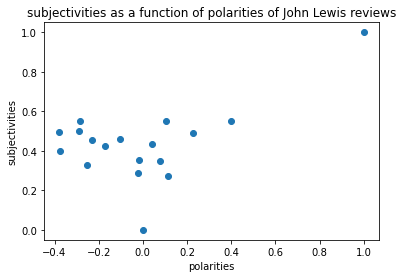

In [11]:
plt.scatter (polarities, subjectivities)
plt.xlabel ("polarities")
plt.ylabel ("subjectivities")
plt.title ("subjectivities as a function of polarities of John Lewis reviews")
plt.show

In [12]:
JL = open ("JohnLewisReviews.txt")
JL_text = JL.read()

In [13]:
def clean_text_round1(text):
#lowercase
    text = text.lower()
#replace square brackets and content inside with ''
    text = re.sub('\[.*?\]', '', text)
#remove instances of punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#remove numbers and words attached to numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
JL_token = nltk.sent_tokenize(JL_text)
JL_token

['I am currently a plusnet broadband customer which I am happy to continue using.',
 'However as my contract has now ended and plusnet will not give me the new customer" cashback incentive I am considering switching to John Lewis who are effectively still plusnet to my knowledge.',
 'In theory if I switch to John Lewis it should be the same service but I will get the current Â£75 black Friday deal as a new customer.',
 'Has anyone used both providers before?',
 'I am presuming it would be a fairly straightforward switch over considering they are effectively the same isp."Avoid.',
 'Avoid.',
 'Avoid.',
 'First John Lewis Broadband failed to process my order and I incurred increased charges from my old supplier.',
 "Then John Lewis Broadband never actually got around to pressing the 'on' button to connect my broadband when they were supposed to.",
 "Just when I thought I'd escaped these incompetents by moving to a new supplier when they jacked their prices up - it now turns out that John

In [15]:
JL_clean_text = [clean_text_round1(sent) for sent in JL_token]
print (JL_clean_text)

['i am currently a plusnet broadband customer which i am happy to continue using', 'however as my contract has now ended and plusnet will not give me the new customer cashback incentive i am considering switching to john lewis who are effectively still plusnet to my knowledge', 'in theory if i switch to john lewis it should be the same service but i will get the current â£ black friday deal as a new customer', 'has anyone used both providers before', 'i am presuming it would be a fairly straightforward switch over considering they are effectively the same ispavoid', 'avoid', 'avoid', 'first john lewis broadband failed to process my order and i incurred increased charges from my old supplier', 'then john lewis broadband never actually got around to pressing the on button to connect my broadband when they were supposed to', 'just when i thought id escaped these incompetents by moving to a new supplier when they jacked their prices up  it now turns out that john lewis broadband havent act

In [16]:
JL_filtered = [word for word in JL_clean_text if word not in stop_words]
JL_filtered

['i am currently a plusnet broadband customer which i am happy to continue using',
 'however as my contract has now ended and plusnet will not give me the new customer cashback incentive i am considering switching to john lewis who are effectively still plusnet to my knowledge',
 'in theory if i switch to john lewis it should be the same service but i will get the current â£ black friday deal as a new customer',
 'has anyone used both providers before',
 'i am presuming it would be a fairly straightforward switch over considering they are effectively the same ispavoid',
 'avoid',
 'avoid',
 'first john lewis broadband failed to process my order and i incurred increased charges from my old supplier',
 'then john lewis broadband never actually got around to pressing the on button to connect my broadband when they were supposed to',
 'just when i thought id escaped these incompetents by moving to a new supplier when they jacked their prices up  it now turns out that john lewis broadband h

In [17]:
JL_cleaned_text = []
JL_text_lower.translate(str.maketrans("","",string.punctuation))
JL_cleaned_text

NameError: name 'JL_text_lower' is not defined

In [ ]:
JL_filtered = [word for word in JL_token if word not in stop_words]

In [ ]:
JL_filtered_sent = (" ").join(JL_filtered)
JL_filtered_sent

JL_sent = nltk.sent_tokenize(JL_filtered_sent)
JL_sent

In [ ]:
for sent in JL_sent:
    print ("\n")
    print (np.average(sentiment(str(review))))
    print (sent)